In [129]:
import numpy as np
from scipy.linalg import eigh
from scipy.sparse import csr_matrix, kron
from scipy.sparse.linalg import expm_multiply
from scipy.linalg import expm

import random

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm, ticker, colors
from scipy.optimize import curve_fit

from numpy.random import choice
from scipy.special import binom

In [130]:
rc = {"font.family" : "serif", "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

# Stark hamiltonian

In [131]:
# Define Stark Hamiltonian
def SP_hamiltonian(N, J, h0):
    H=np.zeros((N,N))
    for i in range(N-1):
        # hoping term
        H[i,i+1] = J;
        H[i+1,i] = J;
    for i in range(N):
        # gradient term
        H[i,i] = (i+1)*(h0)
    return H


In [132]:
# Unitary time evolution of initial state
def SP_timePsi(N,J,h0,t,N_t):
    H= SP_hamiltonian(N,J,h0)
    
    # initial state
    Psi_0_t=np.zeros(N);
    m= int(N/2)
    Psi_0_t[m]=1;
    #time evolution state
    Psi_t= []
    for ti in range(0,N_t):
        Psi_t.append(expm(-1j*H*t[ti]) @ Psi_0_t);
    return Psi_t

## 
$QFI(h0)=4 \chi \\
F= |\braket{\phi_0(h_0)|\phi_0(h_0+\delta h_0)}|=1-\frac{1}{2} (\delta h_0)^2 \chi $


In [133]:
# Unitary time evolution of the QFI
def SP_timeQFI(N,J,h0,d_h0,t,N_t):
    Psi_t = SP_timePsi(N,J,h0,t,N_t)
    d_Psi_t = SP_timePsi(N,J,h0+d_h0,t,N_t)
    QFI_t= np.zeros(N_t);
    for ti in range(N_t):
        F = np.dot(np.transpose(d_Psi_t[ti]).conj(),Psi_t[ti]);
        QFI_t[ti]= 4*(1-np.abs(F.conj()*F))/ d_h0**2
    return QFI_t

In [81]:
J = -1; delta_t = 1; T = 10000;
N_t= int(T/delta_t); t=np.linspace(1,T,N_t);

In [53]:
N = 100; 
d_h0=.00001;
h0 =.01; 
QFI_01 = SP_timeQFI(N,J,h0,d_h0,t,N_t)
h0 =.08; 
QFI_08 = SP_timeQFI(N,J,h0,d_h0,t,N_t)
h0 =.5; 
QFI_5 = SP_timeQFI(N,J,h0,d_h0,t,N_t)


In [ ]:
# time scaling for small time
def fitting(x,a,b):
    return a* x**b 
x_fit = np.linspace(1, 20, 20);
fitplot , _ = curve_fit(fitting,x_fit,QFI_01[0:20]);
a,b = fitplot
print(a,b)

2.0143335423853137 3.9968879730169005


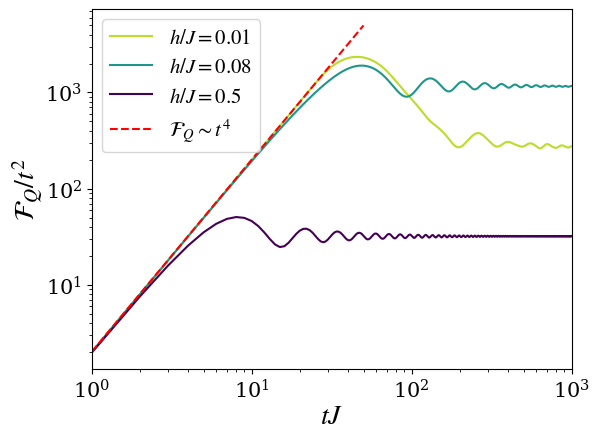

In [72]:
colors = plt.colormaps.get_cmap('viridis').resampled(20).colors
fig= plt.figure()
axes1= fig.add_axes([0.2, 0.2, 0.75, 0.75])

plt.plot(t,np.array(QFI_01)/t**2,'-', label='$h/J= 0.01$', color=colors[17])
plt.plot(t,np.array(QFI_08)/t**2,'-', label='$h/J= 0.08$', color=colors[10])
plt.plot(t,np.array(QFI_5)/t**2,'-', label='$h/J= 0.5$', color=colors[0])

t_fit = np.linspace(1, 50, 50-1);
plt.plot(t_fit,a* t_fit**b/t_fit**2, '--', label='$\mathcal{F}_{Q} \sim t^{4}$', color='r')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
plt.xlabel("$tJ$",fontsize=20, labelpad= 0)
plt.ylabel("$\mathcal{F}_{Q}/t^2$", fontsize=20, labelpad=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc='upper left',fontsize= '15')
plt.show()


In [84]:
n_site= 14;
Num= [
      20, 40, 60, 80, 100, 120, 140, 160, 180, 200,
      250, 300, 350, 400
      ]
# h0= [
#       .011, .012, .013, .014, .015, .016, .017, .018, .019,
#       .02, .025, 
#       .03, .04, .05, .06, .07, .08, .09,
#       .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1
#       ]
# n_h0= 37;

h0_1= np.linspace(.01,.1,91); h0_2= np.linspace(.1,1,51);
h0= np.zeros(142); h0[0:91]= h0_1; h0[91:142]= h0_2;
n_h0= 142

d_h0= .000001

In [ ]:
# calculation of QFI at long time limit

t=np.linspace(T,T,1); N_t=1; # to speed up the calculation we use the final time
QFIh0N = np.zeros((n_site,n_h0))
for nu in range(0,n_site):
        for el0 in range(0,n_h0):
                QFI= SP_timeQFI(int(Num[nu]),J,h0[el0],d_h0,t,N_t)
                QFIh0N[nu,el0]= QFI[N_t-1]
        print('nu=',nu)


In [ ]:
# scaling with h/J in localized phase
def fitting(x,a,b):
    return a* x**b 
x_fit = h0[130:n_h0];
fitplot , _ = curve_fit(fitting,x_fit,QFIh0N[4,130:n_h0]);
a,b= fitplot
print(a,b)

799968726.037933 -1.9993757163118577


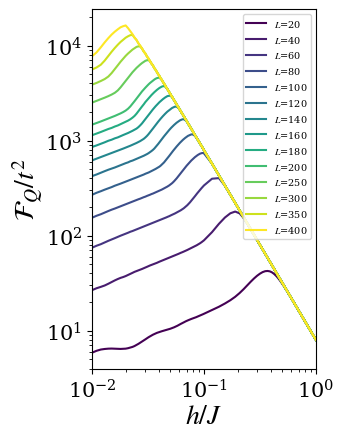

In [99]:
colors = plt.colormaps.get_cmap('viridis').resampled(14).colors
fig= plt.figure()
axes1= fig.add_axes([0.2, 0.2, .35, .75])
axes1.plot(h0,QFIh0N[0,:]/T**2,'-',label='$L$=20', color=colors[0])
axes1.plot(h0,QFIh0N[1,:]/T**2,'-',label='$L$=40', color=colors[1])
axes1.plot(h0,QFIh0N[2,:]/T**2,'-',label='$L$=60', color=colors[2])
axes1.plot(h0,QFIh0N[3,:]/T**2,'-',label='$L$=80', color=colors[3])
axes1.plot(h0,QFIh0N[4,:]/T**2,'-',label='$L$=100', color=colors[4])
axes1.plot(h0,QFIh0N[5,:]/T**2,'-',label='$L$=120', color=colors[5])
axes1.plot(h0,QFIh0N[6,:]/T**2,'-',label='$L$=140', color=colors[6])
axes1.plot(h0,QFIh0N[7,:]/T**2,'-',label='$L$=160', color=colors[7])
axes1.plot(h0,QFIh0N[8,:]/T**2,'-',label='$L$=180', color=colors[8])
axes1.plot(h0,QFIh0N[9,:]/T**2,'-',label='$L$=200', color=colors[9])
axes1.plot(h0,QFIh0N[10,:]/T**2,'-',label='$L$=250', color=colors[10])
axes1.plot(h0,QFIh0N[11,:]/T**2,'-',label='$L$=300', color=colors[11])
axes1.plot(h0,QFIh0N[12,:]/T**2,'-',label='$L$=350', color=colors[12])
axes1.plot(h0,QFIh0N[13,:]/T**2,'-',label='$L$=400', color=colors[13])

# x_fit = np.array(h0[10:n_h0]);
# plt.plot(x_fit,a* x_fit**b/T**2,'--',color='k' )

plt.xscale('log')
plt.yscale('log')
plt.xlim(.01,1)


# Naming the x-axis, y-axis 1and the whole graph
plt.xlabel("$h/J$",fontsize=20, labelpad= 0)
plt.ylabel("$\mathcal{F}_{Q}/t^2$", fontsize=20, labelpad=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
axes1.legend(loc='upper right', fontsize= 7)
plt.show()


In [ ]:
# find the maximum of QFI values at transition point
MaxQFIh0N= [
            max(QFIh0N[0,:]), max(QFIh0N[1,:]), max(QFIh0N[2,:]), max(QFIh0N[3,:])
            , max(QFIh0N[4,:]), max(QFIh0N[5,:]), max(QFIh0N[6,:]), max(QFIh0N[7,:])
            , max(QFIh0N[8,:]), max(QFIh0N[9,:]), max(QFIh0N[10,:])
            , max(QFIh0N[11,:]), max(QFIh0N[12,:]), max(QFIh0N[13,:])
            ]

In [ ]:
# scaling with N at transition point
def fitting(x,a,b):
    return a* x**b 
x_fit = Num[0:n_site-5]
fitplot , _ = curve_fit(fitting,x_fit,np.array(MaxQFIh0N[0:n_site-5])/T**2);
aNMax,bNMax = fitplot
print(aNMax,bNMax)

0.11784825329744983 1.9964814007911136


In [ ]:
# find the QFI values in the extended phase
frsQFIh0N= [(QFIh0N[0,0]), (QFIh0N[1,0]), (QFIh0N[2,0]), (QFIh0N[3,0])
            , (QFIh0N[4,0]), (QFIh0N[5,0]), (QFIh0N[6,0]), (QFIh0N[7,0])
            , (QFIh0N[8,0]), (QFIh0N[9,0]), (QFIh0N[10,0])
            , (QFIh0N[11,0]), (QFIh0N[12,0]), (QFIh0N[13,0])
            ]

In [ ]:
# scaling with N in the extended phase
def fitting(x,a,b):
    return a* x**b 
x_fit = Num
fitplot , _ = curve_fit(fitting,x_fit,np.array(frsQFIh0N)/T**2);
aNfrs,bNfrs = fitplot
print(aNfrs,bNfrs)

0.004494607090473914 2.3958732540749867


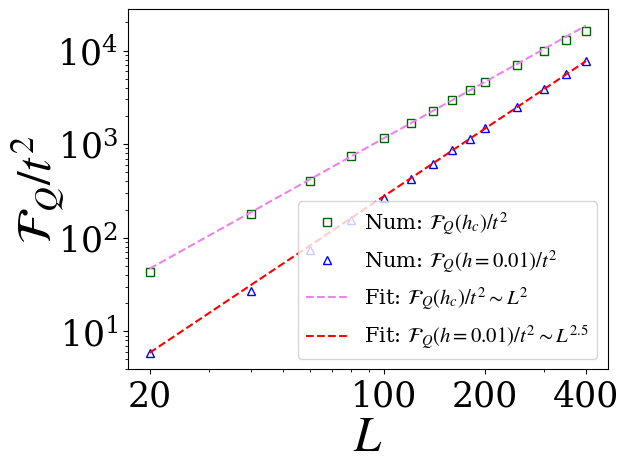

In [113]:
fig= plt.figure()
axes2= fig.add_axes([0.2, 0.2, 0.75, 0.75])

axes2.plot(Num, np.array(MaxQFIh0N)/T**2,'s', markerfacecolor='none', color='darkgreen',label='Num: $\mathcal{F}_{Q}(h_{c})/t^2$')
axes2.plot(Num, np.array(frsQFIh0N)/T**2,'^', markerfacecolor='none',color='blue',label='Num: $\mathcal{F}_{Q}(h = 0.01)/t^2$')
x_fit = np.array(Num);
plt.plot(x_fit,aNMax* x_fit**bNMax, '--', color='violet', label='Fit: $\mathcal{F}_{Q}(h_{c})/t^2\\sim L^{2}$' )
plt.plot(x_fit,aNfrs* x_fit**bNfrs, '--', color='red', label='Fit: $\mathcal{F}_{Q}(h = 0.01)/t^2\\sim L^{2.5}$' )

plt.xscale('log')
plt.yscale('log')
axes2.set_xticks([20, 100, 200,400])                      
axes2.set_xticklabels([20, 100, 200,400]) 

plt.xlabel("$L$",fontsize=35, labelpad=0)
plt.ylabel("$\mathcal{F}_{Q}/t^2$", fontsize=35, labelpad=-7)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

axes2.legend(loc='lower right', fontsize='15')
plt.show()

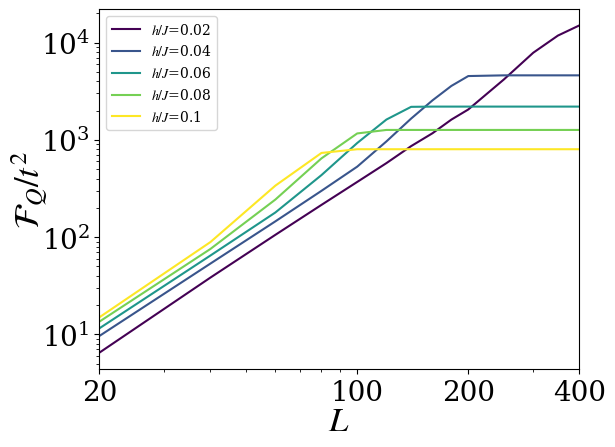

In [93]:
colors = plt.colormaps.get_cmap('viridis').resampled(20).colors
fig= plt.figure()
axes1= fig.add_axes([0.2, 0.2, 0.75, 0.75])

axes1.plot(Num,QFIh0N[:,9]/T**2,'-',label='$h/J$=0.02', color=colors[0])
axes1.plot(Num,QFIh0N[:,12]/T**2,'-',label='$h/J$=0.04', color=colors[5])
axes1.plot(Num,QFIh0N[:,14]/T**2,'-',label='$h/J$=0.06', color=colors[10])
axes1.plot(Num,QFIh0N[:,16]/T**2,'-',label='$h/J$=0.08', color=colors[15])
axes1.plot(Num,QFIh0N[:,18]/T**2,'-',label='$h/J$=0.1', color=colors[19])

plt.xscale('log')
plt.yscale('log')
plt.xlim(20,400)
axes1.set_xticks([20, 100, 200,400])                      
axes1.set_xticklabels([20, 100, 200,400]) 

# Naming the x-axis, y-axis 1and the whole graph
plt.xlabel("$L$",fontsize=25, labelpad= -2)
plt.ylabel("$\mathcal{F}_{Q}/t^2$", fontsize=25, labelpad=-7)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
axes1.legend(loc='upper left', fontsize= '10')
# plt.rcParams['font.size'] = '10'

plt.show()


In [101]:
n_site= 31;
Num100= np.linspace(95,105,n_site)
Num200= np.linspace(185,215,n_site)
Num300= np.linspace(285,315,n_site)

h02=np.linspace(.01,.1,37)
n_h0=37

In [ ]:
# The QFI with respect to N
QFIh0N100 = np.zeros((n_site,n_h0))
QFIh0N200 = np.zeros((n_site,n_h0))
QFIh0N300 = np.zeros((n_site,n_h0))
for nu in range(0,n_site):
        for el0 in range(0,n_h0):
                QFI= SP_timeQFI(int(Num100[nu]),J,h02[el0],d_h0,t,N_t)
                QFIh0N100[nu,el0]= QFI
                QFI= SP_timeQFI(int(Num200[nu]),J,h02[el0],d_h0,t,N_t)
                QFIh0N200[nu,el0]= QFI
                QFI= SP_timeQFI(int(Num300[nu]),J,h02[el0],d_h0,t,N_t)
                QFIh0N300[nu,el0]= QFI
                # print('nu=',nu, 'el0=', el0)

In [ ]:
# Scaling with N for N=100
def fitting(x,a,b):
    return a* x**b 
x_fit = Num100;
aBeta100=np.zeros(n_h0)
bBeta100=np.zeros(n_h0)
for nu in range(0,n_h0):
    fitplot , _ = curve_fit(fitting,x_fit,np.array(QFIh0N100[:,nu])/T**2);
    aBeta100[nu],bBeta100[nu] = fitplot
# print(bBeta100)

In [ ]:
# Scaling with N for N=200
def fitting(x,a,b):
    return a* x**b 
x_fit = Num200;
aBeta200=np.zeros(n_h0)
bBeta200=np.zeros(n_h0)
for nu in range(0,n_h0):
    fitplot , _ = curve_fit(fitting,x_fit,np.array(QFIh0N200[:,nu])/T**2);
    aBeta200[nu],bBeta200[nu] = fitplot
# print(bBeta200)

In [ ]:
# Scaling with N for N=300
def fitting(x,a,b):
    return a* x**b 
x_fit = Num300;
aBeta300=np.zeros(n_h0)
bBeta300=np.zeros(n_h0)
for nu in range(0,n_h0):
    fitplot , _ = curve_fit(fitting,x_fit,np.array(QFIh0N300[:,nu])/T**2);
    aBeta300[nu],bBeta300[nu] = fitplot
# print(bBeta300)

In [ ]:
# dashed lines at the transition point
ytr8= np.linspace(0,3,10);
xtr8= 8*np.ones(10)

xtr2= np.linspace(2,9,10);
ytr2= 2*np.ones(10)

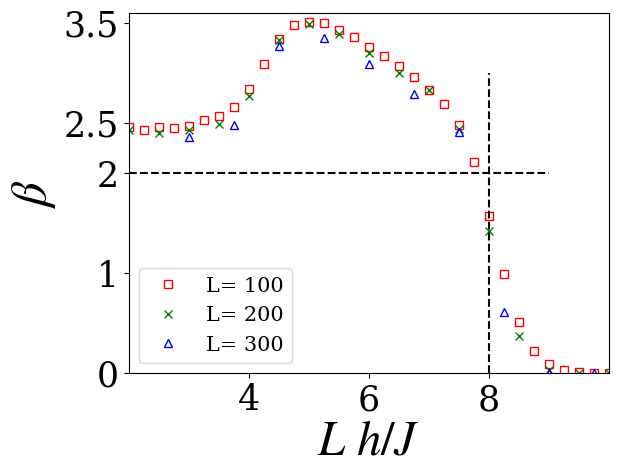

In [112]:
fig= plt.figure()
axes2= fig.add_axes([0.2, 0.2, 0.75, 0.75])

axes2.plot(h02*100,bBeta100,'s', markerfacecolor='none', color='r', label= 'L= 100')
axes2.plot(h02*200,bBeta200,'x', markerfacecolor='none',color='g', label= 'L= 200')
axes2.plot(h02*300,bBeta300,'^', markerfacecolor='none',color='b', label= 'L= 300')
plt.xlabel('$L~h/J$',fontsize=35, labelpad=0)
plt.ylabel('$\\beta$',fontsize=35)
# plt.xscale('log')
plt.xlim(2,10)
plt.ylim(0,3.6)
axes2.set_xticks([4,6,8])                      
axes2.set_xticklabels([4,6,8])
axes2.set_yticks([0,1,2,2.5,3.5])                      
axes2.set_yticklabels([0,1,2,2.5,3.5])

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
axes2.legend(loc='lower left', fontsize= '15')

plt.plot(xtr8,ytr8,'--',color= 'k')
plt.plot(xtr2,ytr2,'--',color= 'k')
plt.show()


## Population
$P_l(t)= |\braket{l|\Psi_{h0}(t)}|^2$


In [99]:
N = 100;
J = -1; delta_t= 1; T= 100; N_t= int(T/delta_t);
t= np.linspace(0,T,N_t+1);

In [105]:
h0 =.01;
Psi_t_01=np.array(SP_timePsi(N,J,h0,t, N_t));
h0 =.08;
Psi_t_08=np.array(SP_timePsi(N,J,h0,t, N_t));
h0 =.5;
Psi_t_5=np.array(SP_timePsi(N,J,h0,t, N_t));

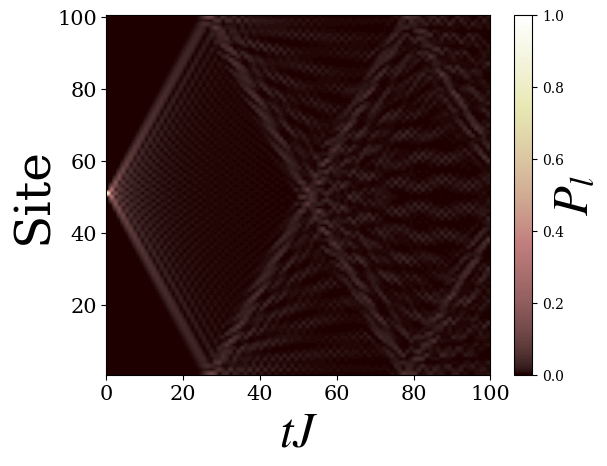

In [107]:
fig= plt.figure()
axes= fig.add_axes([0.2, 0.2, 0.75, 0.75])
im = axes.imshow(np.abs(np.transpose(Psi_t_01).conj()*np.transpose(Psi_t_01)), interpolation='bilinear', origin='lower',
               cmap=cm.pink, extent=[0, T, 0.5, N+.5], vmin=0, vmax= 1, aspect='auto')
# im = axes.imshow(np.abs(Psi_t_08.conj()*Psi_t_08), interpolation='bilinear', origin='lower',
#                cmap=cm.pink, extent=[0, T, 0.5, N+.5], vmin=0, vmax= 1, aspect='auto')
# im = axes.imshow(np.abs(Psi_t_5.conj()*Psi_t_5), interpolation='bilinear', origin='lower',
#                cmap=cm.pink, extent=[0, T, 0.5, N+.5], vmin=0, vmax= 1, aspect='auto')

plt.xlim(0,100)

plt.xlabel('$tJ$',fontsize=35)
plt.ylabel('Site',fontsize=35, labelpad=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cbar= fig.colorbar(im, orientation='vertical',  shrink=1)
cbar.set_label('$P_l$',size=35, labelpad=-10)
# cbar.ax.tick_params(labelsize=15)
plt.show()


## CFI
$\mathcal{F}_{C}(h)= \sum_{x} \frac{1}{p_x(h) }(\frac{d p_x}{dh})^2$

In [233]:
# Unitary time evolution CFI
def SP_timeCFI(N,J,h0,d_h0,t,N_t):
    Psi_t = SP_timePsi(N,J,h0,t,N_t)
    d_Psi_t = SP_timePsi(N,J,h0+d_h0,t,N_t)
    CFI_t= np.zeros(N_t,complex);
    for ti in range(N_t):
        P= (Psi_t[ti].conj()*Psi_t[ti])
        # print(P)
        d_P= (d_Psi_t[ti].conj()*d_Psi_t[ti])
        # print(d_P)
        devP= (d_P-P)/d_h0

        CFI_t[ti]= sum(1/P[i] *devP[i].conj()* devP[i] for i in range(0,N))

    return CFI_t


In [218]:
J=-1;
T=500; delta_t= 1;  N_t= int(T/delta_t)
t=np.linspace(1,T,N_t)


In [219]:
# For comparing the CFI with the QFI 
n0=np.linspace(0,.009,10); n1=np.linspace(.01,.1,10); n2= np.linspace(.15,.5,8);n3= np.linspace(.52,1,25);
n4= np.linspace(2,5,4);
h0= np.zeros(57);h0[0:10]=n0; h0[10:20]= n1; h0[20:28]= n2; h0[28:53]=n3; h0[53:57]= n4;
n_h0= 57

#For comparing dh Baysian estimation with Cramer-Rao bound
# h0= np.array([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
# n_h0= 10;

d_h0= .0000001

In [220]:
# CFI with respect to h/J
N= 16
CFIh016 = np.zeros(n_h0,complex)
for el0 in range(0,n_h0):
        CFI_t= SP_timeCFI(N,J,h0[el0],d_h0,t,N_t) 
        # averaging over CFI in t^2 scaling regime
        CFIh016[el0]= np.mean(CFI_t[100:]/t[100:]**2) 

In [221]:
# QFI with respect to h/J 
T=500; t=np.linspace(500,T,1);
N_t= 1
N=16
QFIh016 = np.zeros(n_h0)
for el0 in range(0,n_h0):
    QFI= SP_timeQFI(N,J,h0[el0],d_h0,t,N_t)
    QFIh016[el0]= QFI[N_t-1]
# print('nu=',nu)


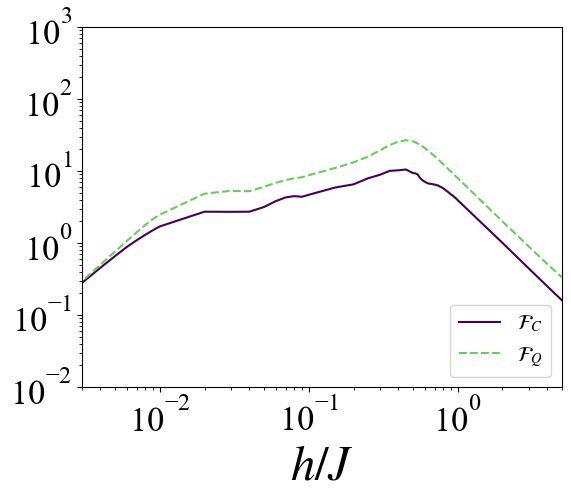

In [223]:
colors = plt.colormaps.get_cmap('viridis').resampled(14).colors
fig= plt.figure()
axes1= fig.add_axes([0.2, 0.2, 0.75, 0.75])


plt.plot(h0,CFIh016, label='$\\mathcal{F}_{C}$', color=colors[0])
plt.plot(h0,QFIh016/T**2, '--', label='$\\mathcal{F}_{Q}$', color=colors[10])

plt.xscale('log')
plt.yscale('log')
plt.xlim(.003,5)
plt.ylim(.01,1000)
plt.xlabel("$h/J$",fontsize=35)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# ax.set_yticks([.1,.2])
# plt.tick_params(labelcolor='r', labelsize='medium', width=10)

#plt.title("")

plt.legend(loc='lower right', fontsize= '15')
#plt.rcParams['font.size'] = '10'
plt.show()


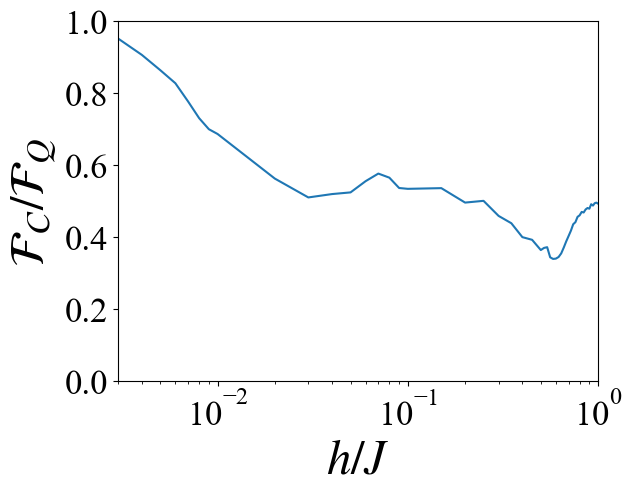

In [224]:
colors = plt.colormaps.get_cmap('viridis').resampled(14).colors
fig= plt.figure()
axes1= fig.add_axes([0.2, 0.2, 0.75, 0.75])


plt.plot(h0,CFIh016/(QFIh016/T**2))

plt.xscale('log')
# plt.yscale('log')
plt.xlim(.003,1)
plt.ylim(0,1)
plt.xlabel("$h/J$",fontsize=35)
plt.ylabel("$\\mathcal{F}_{C}/\\mathcal{F}_{Q}$",fontsize=35)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# ax.set_yticks([.1,.2])
# plt.tick_params(labelcolor='r', labelsize='medium', width=10)

plt.show()


## Maximum likelihood

In [ ]:
# maximum likekihood estimation
def SP_time_MLE(N,J,h0,n_h0,h0_es,M):
    # initial state
    Psi_0_t=np.zeros(N);
    m= int(N/2);
    Psi_0_t[m]=1;

    # probability of position measurement
    p=np.zeros((N,n_h0));
    for i_h in range(n_h0):
        H= SP_hamiltonian(N,J,h0[i_h])
        Psi_t= np.dot(expm(-1j*H*T),Psi_0_t);
        p[:,i_h]= abs(np.transpose(Psi_t).conj()*Psi_t)
    
    # probability of the real value
    H= SP_hamiltonian(N,J,h0_es);
    Psi_t_es= np.dot(expm(-1j*H*T),Psi_0_t);
    p_es= np.transpose(Psi_t_es).conj()*Psi_t_es
    
    # outcome
    max_M= [];
    # repetitions
    M= 100
    for n in range(M):
        # Measurement on Lattice      
        n_l= np.zeros(N)
        for i_m in range(M):
            r= choice(N,1,p=abs(p_es))
            n_l[r]+= 1

        # likelihood
        One= np.ones(n_h0);
        likelihood=One;
        for i_N in range(N):
            likelihood= likelihood * binom(M,n_l[i_N]) * p[i_N,:]**n_l[i_N]

        # posterior probability distribution
        P_h0= likelihood

        # find the maximum value of the probability 
        max_M.append(np.argmax(P_h0))
    
    # averating over repetitions
    muMax= np.mean(h0[max_M])
    varMax= np.var(h0[max_M])
    
    return muMax , varMax


In [137]:
J=-1;
T=500; delta_t= 1;  N_t= int(T/delta_t)
t=np.linspace(1,T,N_t)

In [ ]:
N= 16;

# n_es= 10
# n_es= 19
n_es= 46
h0_es= np.linspace(.1,1,n_es)

# number of repetitions
M=100

muMax_h0= np.zeros(n_es); varMax_h0= np.zeros(n_es)
for i_hes in range(0,n_es):
    
    # estimation period of h_es
    n_h0_b= 21
    h0_b= np.linspace(h0_es[i_hes]-.001, h0_es[i_hes]+.001,n_h0_b)
    dh0= h0_b[1]-h0_b[0]

    muMax, varMax= SP_time_MLE(N,J,h0_b,n_h0_b,h0_es[i_hes],M)

    muMax_h0[i_hes]= muMax
    varMax_h0[i_hes]= varMax   


In [214]:
# specify for M=100 repetition
varMax_h0_100= varMax_h0
muMax_100= muMax_h0

In [234]:
# CFI
T=500; delta_t= 1;  N_t= int(T/delta_t)
t=np.linspace(1,T,N_t)
n_h0= 10; h0= np.linspace(.1,1,n_h0)
CFIh016 = np.zeros(n_h0,complex)
for el0 in range(0,n_h0):
        CFI_t= SP_timeCFI(N,J,h0[el0],d_h0,t,N_t) 
        CFIh016[el0]= np.mean(CFI_t[100:]/t[100:]**2) 

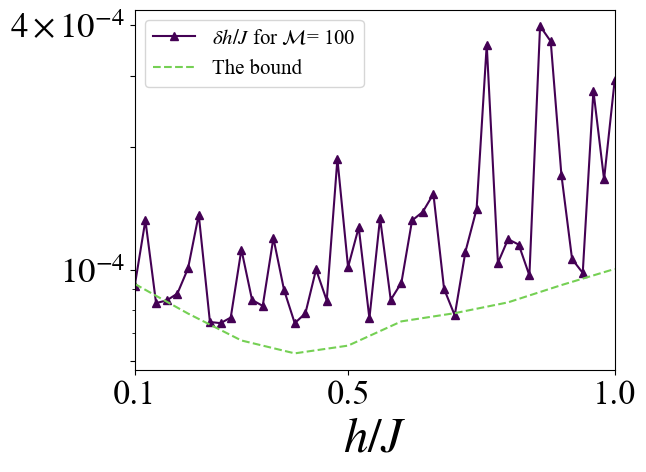

In [237]:
colors = plt.colormaps.get_cmap('viridis').resampled(20).colors
fig= plt.figure()
axes1= fig.add_axes([0.2, 0.2, 0.75, 0.75])

plt.plot(h0_es, np.sqrt(varMax_h0_100), '^-', label= '$\\delta h/J$ for $\\mathcal{M}$= 100', color= colors[0])
plt.plot(h0,1/np.sqrt(M*abs(CFIh016)*T**2), '--', color= colors[15], label= 'The bound')

plt.yscale('log')
plt.xlim(.1,1)

plt.xlabel("$h/J$",fontsize=35)
axes1.yaxis.set_label_coords(-.1, .65)
axes1.set_xticks([.1, .5, 1])
axes1.set_yticks([6e-5, 1e-4, 2e-4, 3e-4, 4e-4])
axes1.set_yticklabels(['','$10^{-4}$','', '', '$4 \\times 10^{-4}$'])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(loc='upper left', fontsize= '15')
#plt.rcParams['font.size'] = '10'

plt.show()


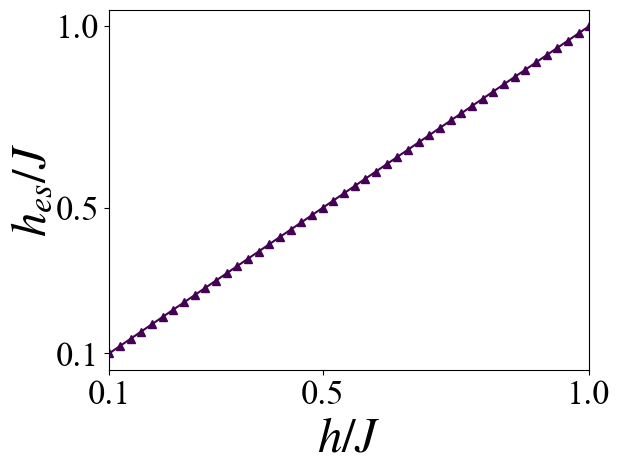

In [216]:
colors = plt.colormaps.get_cmap('viridis').resampled(20).colors
fig= plt.figure()
axes1= fig.add_axes([0.2, 0.2, 0.75, 0.75])

plt.plot(h0_es, muMax_100, '^-', color= colors[0])

plt.xlim(.1,1)

plt.xlabel("$h/J$",fontsize=35)
plt.ylabel("$h_{es}/J$", fontsize=35, labelpad= 0)
axes1.set_yticks([.1, .5, 1])
axes1.set_xticks([.1, .5, 1])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.show()


## Decoherence
$ \mathcal{F}_{Q}(h)= 2 \sum_{nm} \frac{\braket{\Psi_m|\partial_h \rho_h|\Psi_n}}{\rho_n +\rho_m}$ 

In [ ]:
# calculation the QFI under the enfluence of the decoherence
def QLindbladQFI(N,J,h0,t,gamma):
    # initial state
    psi=np.zeros(N);
    m= int(N/2);
    psi[m]=1;
    Psi_0_t= Qobj(psi)
    
    H= Qobj(SP_hamiltonian(N, J, h0))

    # solving the master equation
    I= np.eye(N)
    c=np.zeros((N,N));
    C=[]
    for i_m in range(N):
        c[i_m,i_m]=1
        C.append(Qobj(-2*gamma*c+I))
    results= mesolve(H,Psi_0_t,t,C,[])
    rho_t= results.states
    d_H= Qobj(SP_hamiltonian(N, J, h0+d_h0))
    results= mesolve(d_H,Psi_0_t,t,C,[])
    d_rho_t= results.states

    Dev_rho_t= (np.array(d_rho_t)-np.array(rho_t))/d_h0

    # calculation of the QFI
    QFI_t= [];
    for i_t in range(N_t):
        eigval, eigvec= eigh(rho_t[i_t].full())

        QFI=0;
        for n in range(N):
            for m in range(N):
                if eigval[n]+eigval[m]>=1e-15:
                    QFI+= 2*(abs(np.dot(eigvec[:,m].transpose().conj(), np.dot(Dev_rho_t[i_t].full(), eigvec[:,n]))**2/(eigval[m]+eigval[n])))
                    
        QFI_t.append(QFI)

    return rho_t, QFI_t

In [16]:
J = -1; 
delta_t = 1; T = 200;
N_t= int(T/delta_t+1); t_d=np.linspace(0,T,N_t);

In [17]:
N=6;
d_h0=1e-5;

gamma=np.sqrt(.005)
h0= .1; 
rho_t, QQFI_t_h1_g005= QLindbladQFI(N,J,h0,t_d,gamma)
h0= .5;
rho_t, QQFI_t_h5_g005= QLindbladQFI(N,J,h0,t_d,gamma)
h0= 1;
rho_t, QQFI_t_h10_g005= QLindbladQFI(N,J,h0,t_d,gamma)


/tmp/ipykernel_3543/1284532953.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t_d,QQFI_t_h1_g005/t_d**2, color=colors[0], markevery=100, label='$h/J= 0.1$')
/tmp/ipykernel_3543/1284532953.py:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t_d,QQFI_t_h5_g005/t_d**2, color=colors[10], markevery=100, label='$h/J= 0.5$')
/tmp/ipykernel_3543/1284532953.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t_d,QQFI_t_h10_g005/t_d**2, color=colors[17], markevery=100, label='$h/J= 1$')


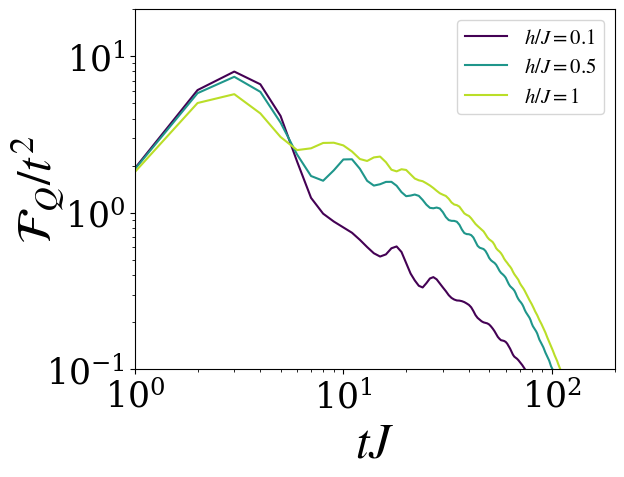

In [18]:
colors = plt.colormaps.get_cmap('viridis').resampled(20).colors
fig= plt.figure()
axes1= fig.add_axes([0.2, 0.2, 0.75, 0.75])

plt.plot(t_d,QQFI_t_h1_g005/t_d**2, color=colors[0], markevery=100, label='$h/J= 0.1$')
plt.plot(t_d,QQFI_t_h5_g005/t_d**2, color=colors[10], markevery=100, label='$h/J= 0.5$')
plt.plot(t_d,QQFI_t_h10_g005/t_d**2, color=colors[17], markevery=100, label='$h/J= 1$')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,200)
plt.ylim(0.1,20)

plt.xlabel("$tJ$",fontsize=35)
plt.ylabel("$\mathcal{F}_{Q}/t^2$", fontsize=35, labelpad= -15)
# axes1.set_yticks([0, 15, 30])
# axes1.set_yticklabels(['$0$','$10^{3}$',' $2 \\times 10^{3}$'])
# axes1.set_xticks([50, 100])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# ax.set_yticks([.1,.2])
# plt.tick_params(labelcolor='r', labelsize='medium', width=10)

#plt.title("")

plt.legend(loc='upper right', fontsize= '15')
# plt.rcParams['font.size'] = '10'

plt.show()

In [ ]:
delta_t = .1; T = 100;
N_t= int(T/delta_t); t_d=np.linspace(1,T,N_t);

In [ ]:
N=16;
d_h0=1e-11;
h0= .1;
gamma=np.sqrt(.005)
rho_t, QQFI_t_h1_g005= QLindbladQFI(N,J,h0,t_d,gamma)
gamma=np.sqrt(.01)
rho_t, QQFI_t_h1_g01= QLindbladQFI(N,J,h0,t_d,gamma)
gamma=np.sqrt(.05)
rho_t, QQFI_t_h1_g05= QLindbladQFI(N,J,h0,t_d,gamma)

In [ ]:
N = 16; 
d_h0=.00001;
h0 =.1;
QFI_161 = SP_timeQFI(N,J,h0,d_h0,t,N_t)

/tmp/ipykernel_2794/948911316.py:17: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t_d,QQFI_t_h1_g005/t_d**2, color=colors[0], markevery=100, label='$\gamma/J= 0.005$')
/tmp/ipykernel_2794/948911316.py:20: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t_d,QQFI_t_h1_g01/t_d**2, color=colors[10], markevery=100, label='$\gamma/J= 0.01$')
/tmp/ipykernel_2794/948911316.py:22: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t_d,QQFI_t_h1_g05/t_d**2, color=colors[17], markevery=100, label='$\gamma/J= 0.05$')
/tmp/ipykernel_2794/948911316.py:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t,QFI_161/t**2, '--', label='$\gamma/J= 0$', color='k')


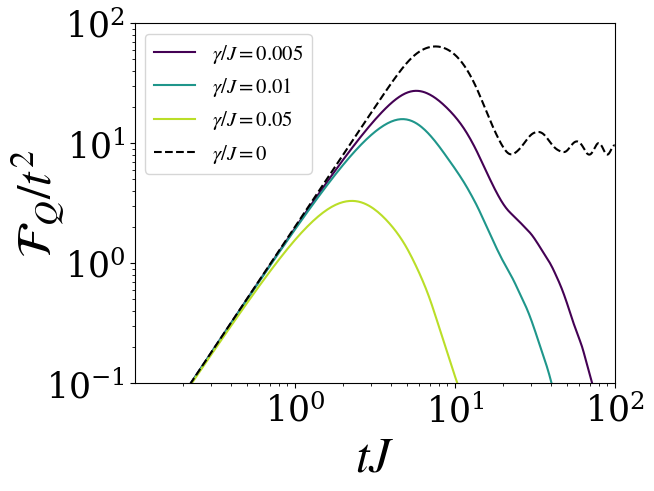

In [34]:
colors = plt.colormaps.get_cmap('viridis').resampled(20).colors
fig= plt.figure()
axes1= fig.add_axes([0.2, 0.2, 0.75, 0.75])

plt.plot(t_d,QQFI_t_h1_g005/t_d**2, color=colors[0], markevery=100, label='$\gamma/J= 0.005$')
plt.plot(t_d,QQFI_t_h1_g01/t_d**2, color=colors[10], markevery=100, label='$\gamma/J= 0.01$')
plt.plot(t_d,QQFI_t_h1_g05/t_d**2, color=colors[17], markevery=100, label='$\gamma/J= 0.05$')

plt.plot(t,QFI_161/t**2, '--', label='$\gamma/J= 0$', color='k')

plt.xscale('log')
plt.yscale('log')
plt.xlim(.1,100)
plt.ylim(0.1,100)

plt.xlabel("$tJ$",fontsize=35)
plt.ylabel("$\mathcal{F}_{Q}/t^2$", fontsize=35, labelpad= -15)
axes1.set_xticks([1, 10, 100])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(loc='upper left', fontsize= '15')

plt.show()
